### Posttest 5 Kecerdasan Buatan
### Nama : Aghnia Nurhidayah<br> NIM : 2209106020<br> Kelas : A1 22

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.inspection import DecisionBoundaryDisplay

In [247]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [248]:
encoder = LabelEncoder()
data['country'] = encoder.fit_transform(data['country'])
data['gender'] = encoder.fit_transform(data['gender'])
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [249]:
data.drop('customer_id', axis=1, inplace=True)

In [250]:
# determining X and y and scaling X
scaler = StandardScaler()

X = data[['age', 'balance']]
y = data['churn']

X = scaler.fit_transform(X)
X

array([[ 0.29351742, -1.22584767],
       [ 0.19816383,  0.11735002],
       [ 0.29351742,  1.33305335],
       ...,
       [-0.27860412, -1.22584767],
       [ 0.29351742, -0.02260751],
       [-1.04143285,  0.85996499]])

### Supervised

#### A1. Support Vector Classifier

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [253]:
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### A2. Evaluasi Hasil Prediksi

In [254]:
svm.score(X_test, y_test)

0.8145

In [255]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

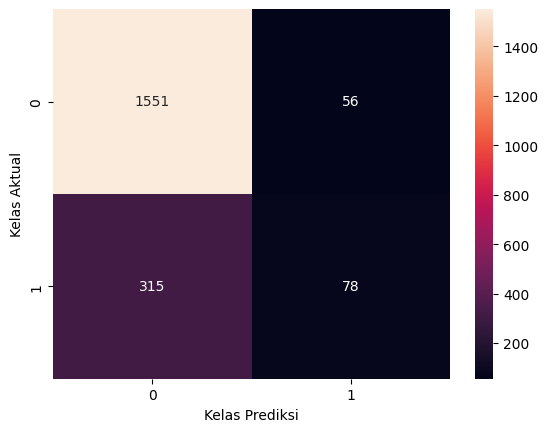

In [256]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

Visualisasi di atas menunjukkan bahwa nilai True Negative sebanyak 1551, True Positive sebanyak 78, False Positive sebanyak 56, dan False Negative sebanyak 315

#### A3. Plot Hasil Prediksi

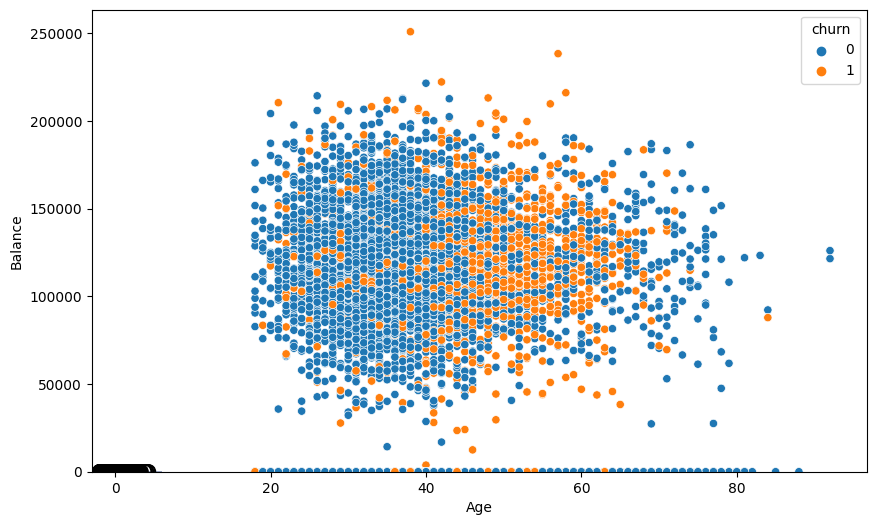

In [257]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='balance', hue='churn', data=data)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

### Unsupervised

#### B1. K-Means

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
X = data[['age','balance']]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_ 
data["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
data["cluster"] = data['cluster'].map(cluster_mapping)

#### B2. Evaluasi Hasil Clustering

Tanpa Label Asli

In [259]:
# Silhouette Score
ss_score = silhouette_score(X, data['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, data['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, data['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.80
Davies-Bouldin Index: 0.23
Calinski-Harabasz Index: 63478.41


Dengan Label Asli

In [260]:
cross_tab = pd.crosstab(data["cluster"], data["churn"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data["churn"], data['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(data['churn'], data['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(data["churn"], data['cluster'])
completeness = completeness_score(data["churn"], data['cluster'])
v_measure = v_measure_score(data["churn"], data['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
churn       0     1
cluster            
0        3255   548
1        4708  1489 

Adjusted Rand Index (ARI): -0.02
Normalized Mutual Information (NMI): 0.01
Homogeneity Score: 0.01
Completeness Score: 0.01
V-Measure Score: 0.01


#### B3. Plot Hasil Clustering

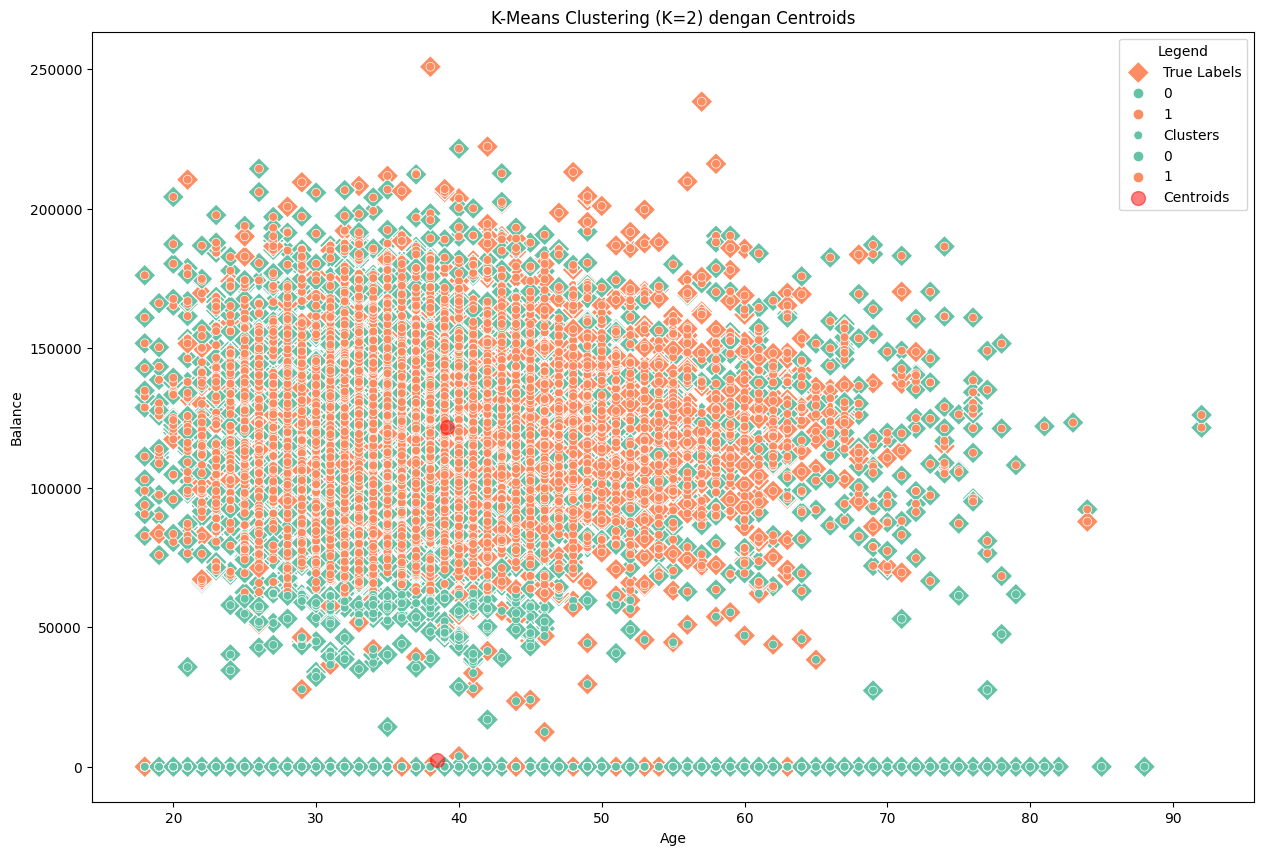

In [261]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x="age", y="balance", hue="churn", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=data, x="age", y="balance", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend(title="Legend", loc="upper right")
plt.show()